In [1]:
import numpy as np

In [2]:
def cal_probability_density(x, mu, sigma) -> int:
    return 1 / (2*np.pi*np.sqrt(np.linalg.det(sigma))) \
           * np.exp(-1/2*(x-mu).dot(np.linalg.pinv(sigma)).dot(x-mu).T)
class Model:
    def __init__(self):
        self.ITER = 1

        self.X = np.array([[0.697, 0.460], # 1
                           [0.774, 0.376],
                           [0.634, 0.264],
                           [0.608, 0.318],
                           [0.556, 0.215],
                           [0.403, 0.237],
                           [0.481, 0.149],
                           [0.437, 0.211],
                           [0.666, 0.091],
                           [0.243, 0.267],
                           # [0.245, 0.057], # 11
                           # [0.343, 0.099],
                           # [0.639, 0.161],
                           # [0.657, 0.198],
                           # [0.360, 0.370],
                           # [0.593, 0.042],
                           # [0.719, 0.103],
                           # [0.359, 0.188],
                           # [0.339, 0.241],
                           # [0.282, 0.257],
                           # [0.748, 0.232], # 21
                           # [0.714, 0.346],
                           # [0.483, 0.312],
                           # [0.478, 0.437],
                           # [0.525, 0.369],
                           # [0.751, 0.489],
                           # [0.532, 0.472],
                           # [0.473, 0.376],
                           # [0.725, 0.445],
                           # [0.446, 0.459]
                           ])

        self.cluster_num = 3

        self.sample_num = len(self.X)

        self.Alpha = []
        for _ in range(self.cluster_num):
            self.Alpha.append(1/self.cluster_num)
        self.Alpha = np.array(self.Alpha)

        self.Mu = np.array([self.X[1], self.X[5], self.X[8]])

        self.Sigma = []
        for _ in range(self.cluster_num):
            self.Sigma.append(np.mat([[0.1, 0],[0, 0.1]]))
        self.Sigma = np.array(self.Sigma)

    def cal_P(self):
        P = []
        for x in self.X:
            temp = []
            for i in range(self.cluster_num):
                temp.append(cal_probability_density(x, self.Mu[i], self.Sigma[i]))
            P.append(temp)
        return np.array(P)

    def cal_Gamma(self):
        P = self.cal_P()
        self.Gamma = np.mat(P * self.Alpha) / np.sum(np.mat(P * self.Alpha), axis=1)

    def update_Alpha(self):
        self.Alpha = np.array(self.Gamma.mean(axis=0))[0]

    def update_Mu(self):
        for col in range(self.cluster_num):
            self.Mu[col] = np.sum(self.X * np.array(self.Gamma[:, col]), axis=0) / np.sum(self.Gamma[:, col])

    def update_Sigma(self):
        for cluster in range(self.cluster_num):
            self.Sigma[cluster] = 0
            for sample in range(self.sample_num):
                self.Sigma[cluster] += (np.mat(self.X[sample]) - self.Mu[cluster]).T \
                                        .dot(np.mat(self.X[sample]) - self.Mu[cluster]) \
                                       * self.Gamma[sample, cluster]
            self.Sigma[cluster] = self.Sigma[cluster] / (np.sum(self.Gamma, axis=0)[0, cluster])

    def fit(self):
        for i in range(self.ITER):
            self.cal_Gamma()
            self.update_Alpha()
            self.update_Mu()
            self.update_Sigma()

In [3]:
model = Model()
model.Alpha, model.Mu, model.Sigma

(array([0.33333333, 0.33333333, 0.33333333]),
 array([[0.774, 0.376],
        [0.403, 0.237],
        [0.666, 0.091]]),
 array([[[0.1, 0. ],
         [0. , 0.1]],
 
        [[0.1, 0. ],
         [0. , 0.1]],
 
        [[0.1, 0. ],
         [0. , 0.1]]]))

In [4]:
model.fit()
model.Alpha, model.Mu, model.Sigma, model.Gamma

(array([0.30453302, 0.36986803, 0.32559896]),
 array([[0.59611859, 0.28455744],
        [0.50475485, 0.24897797],
        [0.55795488, 0.2458665 ]]),
 array([[[0.01934125, 0.00732513],
         [0.00732513, 0.01214118]],
 
        [[0.02455678, 0.00352949],
         [0.00352949, 0.00789276]],
 
        [[0.01999452, 0.00409973],
         [0.00409973, 0.01032529]]]),
 matrix([[0.48129435, 0.25997333, 0.25873233],
         [0.47968758, 0.21883653, 0.30147588],
         [0.34458414, 0.30877359, 0.34664226],
         [0.3568244 , 0.32665801, 0.31651758],
         [0.2825212 , 0.36195272, 0.35552608],
         [0.21804164, 0.47794518, 0.30401318],
         [0.22213668, 0.41200804, 0.36585528],
         [0.2246826 , 0.45011304, 0.32520435],
         [0.27752928, 0.28088531, 0.44158541],
         [0.15802827, 0.60153453, 0.2404372 ]]))

In [5]:
x_list = []
y_list = []
cluster_list = []
for index, x in enumerate(model.X):
    x_list.append(x[0])
    y_list.append(x[1])
    cluster_list.append(np.argmax(model.Gamma[index]) + 1)

KeyboardInterrupt: 

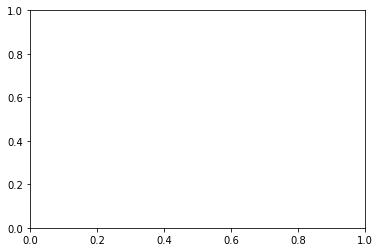

In [6]:
import matplotlib.pyplot as plt
for index, cluster in enumerate(cluster_list):
    if cluster == 1:
        plt.scatter(x_list[index], y_list[index], c='red')
    elif cluster == 2:
        plt.scatter(x_list[index], y_list[index], c='coral')
    else:
        plt.scatter(x_list[index], y_list[index], c='blue')
plt.show()

